In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

import csv

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [29]:
file_path = "/home/jlab/ExternalDrive/Seagate/Data/8-13/"
run_num = [x for x in range(18435,
                            18436)]
print(run_num)
#calotext = "amc1315"
calotext = "eb"
file_name = "run_"+str(run_num[0])+"_"+calotext+".txt"

dfi = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
df = dfi.loc[dfi[0] != 0]
print(file_name)
print(len(df),len(dfi))

for i,runi in enumerate(run_num):
    if i >0.5:
        try:
            file_name = "run_"+str(runi)+"_"+calotext+".txt"
            print(file_name)
            dfi = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
            df = df.append(dfi.loc[dfi[0] != 0])
        except:
            print("ERROR: File", file_name, "not found.")
            run_num.pop(i)
        print(len(df),len(dfi))
        
run_num_txt = str(run_num)

[18435]
run_18435_eb.txt
1783 1812


In [30]:
print(df.head())
df.describe()

               0              1
2  110098.694274  1534201825663
3  110705.858598  1534201826664
4  119558.951693  1534201827665
5   59180.715461  1534201828666
6  119508.015422  1534201829668


,0,1
count,1783.000000,1.783000e+03
mean,91125.879936,1.534203e+12
std,40895.954886,5.217830e+05
min,15.994040,1.534202e+12
25%,59758.765218,1.534202e+12
50%,82827.751122,1.534203e+12
75%,119091.442822,1.534203e+12
max,252149.221089,1.534204e+12


[ 0.    30.184] minutes
[0.         0.50306667] hours


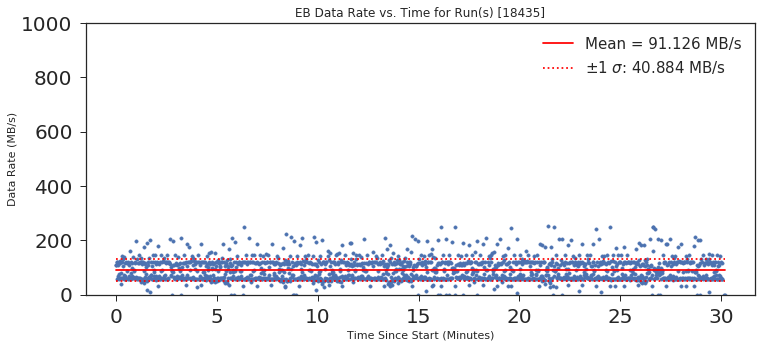

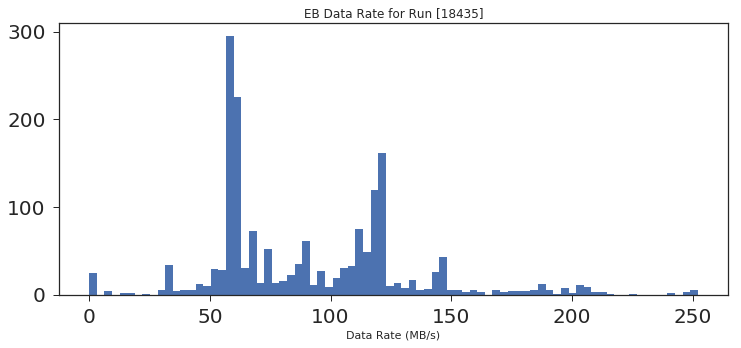

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(y = df[0]/1000, x = (df[1] - list(df[1])[0])/1000/60,label='',marker='.')

plt.xlabel("Time Since Start (Minutes)")
plt.ylabel("Data Rate (MB/s)")
plt.title(calotext.upper()+" Data Rate vs. Time for Run(s) "+ run_num_txt)

x = np.linspace(0, (- list(df[1])[0] + np.amax(list(df[1])))/1000/60, 2)
print(x,"minutes")
print(x/60,"hours")

ax.plot(x, np.mean(df[0]/1000)+x*0,color='red',label = "Mean = "+str(round(np.mean(df[0])/1000,3))+" MB/s")
ax.plot(x, (np.mean(df[0]/1000) + np.std(df[0]/1000)) +x*0,color='red',
        label = '$\pm 1$ $\sigma$: '+str(round(np.std(df[0])/1000,3))+' MB/s',linestyle='dotted')
ax.plot(x, (np.mean(df[0]/1000) - np.std(df[0]/1000)) +x*0,color='red',label = '',linestyle='dotted')


plt.legend(fontsize=15)
plt.ylim(0,1000)
#plt.savefig("./images/daq/rateTest_"+run_num_txt+".png",bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
plt.title(calotext.upper()+" Data Rate for Run "+ run_num_txt)
plt.hist(df[0]/1000, bins=80)
plt.xlabel("Data Rate (MB/s)")
#plt.savefig("./images/daq/rateTestHist_"+run_num_txt+".png",bbox_inches='tight')
plt.show()

In [82]:
frontendlist=["eb","amc1302","amc1303","amc1308","amc1309","amc1311","amc1312","amc1313",
              "amc1315","amc1316","amc1317","amc1318"];

plotvec = []
calovec = []

for run in range(18433, 18437):
    print("Processed Run:",run)
    for i, frontend in enumerate(frontendlist):
        file = file_path+"run_"+str(run)+"_"+frontend+".txt"
        try:
            dfi = pandas.read_csv(file, header=None,delimiter=' ')
        except:
            print("ERR")
            
        data_rate_i = np.mean(dfi[0]) / 1024
        
        try:
            plotvec.append( (run, frontend, data_rate_i, int(frontend[5:7])) )
            calovec.append( int(frontend[5:7]) )
        except:
            plotvec.append( (run, frontend, data_rate_i, 999) )
calovec = list(set(calovec))

Processed Run: 18433
Processed Run: 18434
Processed Run: 18435
Processed Run: 18436


In [83]:
print(plotvec)
print(calovec)

[(18433, 'eb', 76.44239334521318, 999), (18433, 'amc1302', 5.055821316695519, 2), (18433, 'amc1303', 4.518963556466751, 3), (18433, 'amc1308', 3.9991919528402917, 8), (18433, 'amc1309', 4.575646132909888, 9), (18433, 'amc1311', 5.571114602599431, 11), (18433, 'amc1312', 4.311372434850956, 12), (18433, 'amc1313', 4.628403384821779, 13), (18433, 'amc1315', 8.190615462692806, 15), (18433, 'amc1316', 4.210809950136444, 16), (18433, 'amc1317', 4.55174290264576, 17), (18433, 'amc1318', 4.219598377831298, 18), (18434, 'eb', 72.99083290014077, 999), (18434, 'amc1302', 4.515219317610517, 2), (18434, 'amc1303', 4.241254328780875, 3), (18434, 'amc1308', 3.981705672784028, 8), (18434, 'amc1309', 4.344700212639792, 9), (18434, 'amc1311', 4.575096895141482, 11), (18434, 'amc1312', 4.105258158940464, 12), (18434, 'amc1313', 4.173160870973808, 13), (18434, 'amc1315', 8.200866083802177, 15), (18434, 'amc1316', 4.09711606710431, 16), (18434, 'amc1317', 4.335970857233388, 17), (18434, 'amc1318', 4.058555

In [84]:
df = pandas.DataFrame(plotvec)
df.head()

,0,1,2,3
0,18433,eb,76.442393,999
1,18433,amc1302,5.055821,2
2,18433,amc1303,4.518964,3
3,18433,amc1308,3.999192,8
4,18433,amc1309,4.575646,9


        0        1         2  3
1   18433  amc1302  5.055821  2
13  18434  amc1302  4.515219  2
25  18435  amc1302  6.129926  2
37  18436  amc1302  6.127301  2
        0        1         2  3
2   18433  amc1303  4.518964  3
14  18434  amc1303  4.241254  3
26  18435  amc1303  5.720173  3
38  18436  amc1303  5.707862  3
        0        1         2  3
3   18433  amc1308  3.999192  8
15  18434  amc1308  3.981706  8
27  18435  amc1308  4.349457  8
39  18436  amc1308  4.327660  8
        0        1         2  3
4   18433  amc1309  4.575646  9
16  18434  amc1309  4.344700  9
28  18435  amc1309  5.869499  9
40  18436  amc1309  5.789181  9
        0        1         2   3
5   18433  amc1311  5.571115  11
17  18434  amc1311  4.575097  11
29  18435  amc1311  6.112968  11
41  18436  amc1311  6.023756  11
        0        1         2   3
6   18433  amc1312  4.311372  12
18  18434  amc1312  4.105258  12
30  18435  amc1312  5.672162  12
42  18436  amc1312  5.583200  12
        0        1         2  

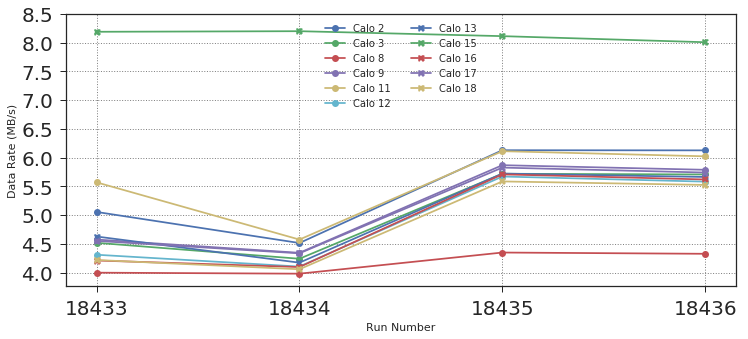

In [92]:
fig, ax = plt.subplots(figsize=(12, 5))#,dpi=300)
for i, calo in enumerate(calovec):
    dfi = df.loc[df[3] == calo]
    print(dfi.head())
    if i > 10:
        markerstring = '^'
    elif i > 5:
        markerstring = 'X'
    else:
        markerstring = 'o'
        
    plt.plot(dfi[0],dfi[2],marker=markerstring,label="Calo "+str(calo))

    
plt.legend(ncol = 2)
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.xticks(np.arange(18433, 18437, step=1))
plt.yticks(np.arange(4, 9, step=.5))
ax.set_xticklabels([x for x in range(18433,18437)])
plt.xlabel("Run Number")
plt.ylabel("Data Rate (MB/s)")
plt.show()

[5.055821316695519, 4.515219317610517, 6.129925917422896, 6.1273006163310155]
--- [82.51302870990699, 73.69018757748168, 100.0428459652344, 100.0]
[4.518963556466751, 4.241254328780875, 5.720173157428808, 5.707862077645225]
--- [79.17086108589096, 74.30548024963144, 100.2156863571003, 100.0]
[3.9991919528402917, 3.981705672784028, 4.349457102142019, 4.327660347311081]
--- [92.4100237054214, 92.00596519220817, 100.50366140319863, 100.0]
[4.575646132909888, 4.344700212639792, 5.869499244174397, 5.789181363142861]
--- [79.0378785166585, 75.04861119571349, 101.38737890546814, 100.0]
[5.571114602599431, 4.575096895141482, 6.112968279429013, 6.023756289486523]
--- [92.48572377210705, 75.95089633899302, 101.48100264444952, 100.0]
[4.311372434850956, 4.105258158940464, 5.672162042998134, 5.5831999942741435]
--- [77.2204549232069, 73.52876778819703, 101.59338817909489, 100.0]
[4.628403384821779, 4.173160870973808, 5.723335075978918, 5.664581724855476]
--- [81.70776960482226, 73.67112125265136, 

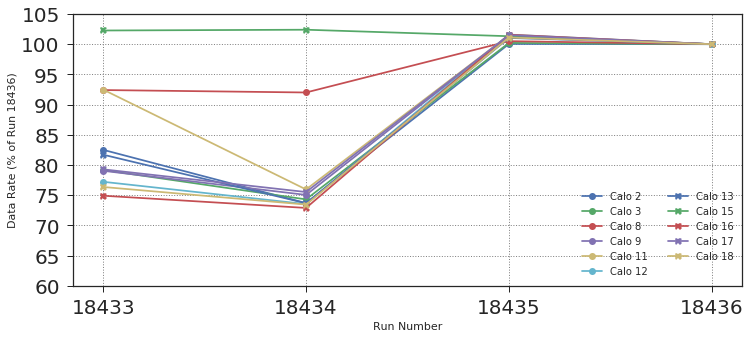

In [104]:
fig, ax = plt.subplots(figsize=(12, 5))#,dpi=300)

for i, calo in enumerate(calovec):
    dfi = df.loc[df[3] == calo]
    ratevec = list(dfi[2])
    print(ratevec)
    percentvec = [x/ratevec[3]*100 for x in ratevec]
    print("---", percentvec)
    
    if i > 10:
        markerstring = '^'
    elif i > 5:
        markerstring = 'X'
    else:
        markerstring = 'o'
    
    plt.plot(dfi[0],percentvec,marker=markerstring,label="Calo "+str(calo))
    
plt.legend(ncol = 2)
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.xticks(np.arange(18433, 18437, step=1))
plt.yticks(np.arange(60, 110, step=5))
ax.set_xticklabels([x for x in range(18433,18437)])
plt.xlabel("Run Number")
plt.ylabel("Data Rate (% of Run 18436)")
plt.show()